# 1 Conditional probability


In [2]:
import enum, random

In [3]:
class Kid(enum.Enum):
    BOY = 0 
    GIRL = 1
    

def random_kid() -> Kid:
    return random.choice([Kid.BOY, Kid.GIRL])

both_girls = 0
older_girl = 0
either_girl = 0

random.seed(0)

for _ in range(10000):
    younger = random_kid()
    older = random_kid()
    if older == Kid.GIRL:
        older_girl += 1
        
    if older == Kid.GIRL and younger == Kid.GIRL:
        both_girls += 1
        
    if older == Kid.GIRL or younger == Kid.GIRL:
        either_girl += 1


In [10]:
print("P(both | older):", both_girls / older_girl)
print("P(both | either):", both_girls / either_girl)

P(both | older): 0.5007089325501317
P(both | either): 0.3311897106109325


# 2 Continuous distribution 

In [12]:
def uniform_pdf(x: float) -> float:
    return 1 if 0 <= x < 1 else 0

In [14]:
def uniform_cdf(x: float) -> float:
    if x<0 : return 0
    elif x<1: return x
    else: return 1

# 3 Normal distribution

In [5]:
import math
SQRT_TWO_PI = math.sqrt(2 * math.pi)

def normal_pdf(x: float, mu: float = 0, sigma: float=1) -> float:
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2) / (SQRT_TWO_PI * sigma))

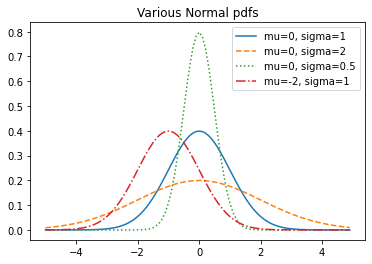

In [9]:
import matplotlib.pyplot as plt

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_pdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_pdf(x, sigma=0.5) for x in xs], ':', label='mu=0, sigma=0.5')
plt.plot(xs, [normal_pdf(x, mu=-1) for x in xs], '-.', label='mu=-2, sigma=1')
plt.legend()
plt.title('Various Normal pdfs')
plt.show()

In [21]:
def normal_cdf(x: float, mu: float = 0, sigma: float = 1) -> float:
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2


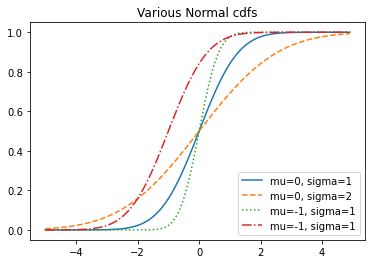

In [23]:
xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma=1) for x in xs], '-', label='mu=0, sigma=1')
plt.plot(xs, [normal_cdf(x, sigma=2) for x in xs], '--', label='mu=0, sigma=2')
plt.plot(xs, [normal_cdf(x, sigma=0.5) for x in xs], ':', label='mu=-1, sigma=1')
plt.plot(xs, [normal_cdf(x, mu=-1) for x in xs], '-.', label='mu=-1, sigma=1')
plt.legend(loc=4)
plt.title("Various Normal cdfs")
plt.show()

In [10]:
def inverse_normal_cdf(p: float, mu: float = 0, sigma: float = 1, tolerance: float = 0.00001) -> float:
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance=tolerance)
    low_z = -10.0
    hi_z = 10.0
    while hi_z - low_z > tolerance:
        mid_z = (low_ + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        if mid_p < p:
            low_z = mid_z
        else: 
            hi_z = mid_z
        return mid_z

# The Central limit Theorem

In [24]:
import random
import math

def bernoulli_trial(p: float) -> int:
    return 1 if random.random() < p else 0

def binomial(n: int, p: float) -> int:
    return sum(bernoulli_trial(p) for _ in range(n))


In [25]:
from collections import Counter

def binomial_histogram(p: float, n: int, num_points: int) -> None:
    data = [binomial(n, p) for _ in range(num_points)]
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
           [v / num_points for v in histogram.values()],
           0.8,
           color='0.75')

    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    xs = range(min(data), max(data) + 1)
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
         for i in xs]
    plt.plot(xs, ys)
    plt.title('binomial distribution vs. normal approximation')
    plt.show()
    

# playground

In [5]:
from typing import List, Tuple
from collections import Counter

def probability(a: List[float], v: int) -> float:
    n = len(a)
    listing = [i for i in a
                  if i == v]
    print(len(listing)/n)
    return len(listing)/n

In [6]:
assert probability(a = [3,2,4,5,65], v = 65) == 0.2

0.2


In [7]:
a = {3,3,5,65,6,7,56}
b = {34,6,6,2,56,3}

a.intersection(b)

{3, 6, 56}

In [8]:
def conditional(e: List[float], v: int, w: int) -> float:
    prob_v = probability(e, v)
    prob_w = probability(e, w)
    return (prob_v*prob_w)/prob_w